# What is deep learning & neural networks?

* We'll talk about it in class soon!
* For now, let's just say it's a non-linear classifier, like a decision tree, that in practice happens to be good for classifying certain classes of data, including text and images.
* Perceptron is a like a really simple version of a neural net.


# What is Keras & what is it used for?

* What is keras
    * Tool for deep learning.  It's a layer on top of tensorflow and theanno
    * Easy to do simple networks more involved to do complicated things
    * Makes common things very simple, if you need to do more non-standard fancy stuff you probably need to use tensorflow
    
* Tons of examples:
https://github.com/fchollet/keras/tree/master/examples
    

# Perceptron in Keras

Adapted from https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py

Actually we're training 10 perceptrons! Aside on what this is, again more about this in class.

We'll be using the "mnist" dataset
<img src="mnist.png" width="300">

Note: use Shift+Enter to run the codeblocks

In [13]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
%matplotlib inline


### Split our data into a train & test set
jkljasdf

In [14]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0],  'test samples')


(60000, 'train samples')
(10000, 'test samples')


### Check out what our data looks like

The shape of each image is(784,)


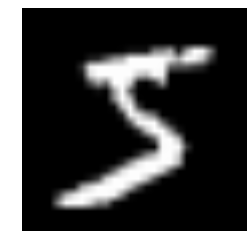

In [15]:
image = x_train[0]
img_rows, img_cols, channels = 28, 28, 1
image = np.reshape(image, [img_rows, img_cols])
plt.imshow(image, cmap='gray')
plt.axis('off')

# The shape of each image is a vector with 784 binary values ("pixels")
image_shape = x_train[0].shape
print("The shape of each image is" + str(image_shape))

### Great, let's make some labels

We're going to convert the data etc
Since we're predicting categories we need to put it in this binary matrix form


In [16]:
# classifying 10 labels
num_classes = 10


print("shape of our data before" + str(y_train.shape))
print("the first 3 elements look like:") 
print(str(y_train[0:3]) + '\n')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print("shape of our data after" + str(y_train.shape))
print("the first 3 elements look like:") 
print(str(y_train[0:3]))

shape of our data before(60000,)
the first 3 elements look like:
[5 0 4]

shape of our data after(60000, 10)
the first 3 elements look like:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### Let's make our model!!

Sequential is an abstraction for really simple networks. Simplest way to link layers. Use Sequential if all your "layers" are linearly stacked- the alternative is the Keras Functional library.


In [17]:

perceptron_model = Sequential()
perceptron_model.add(Dense(num_classes, activation='relu', input_shape=image_shape))

perceptron_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Summary: what does this tell us?

Since we have a lot more data points (60,000) than parameters to train (7850) we're good to go. --> Maybe this is confusing.

todo: maybe visualize

### Compiling the model

Now that we've told the Keras *what the model is*, we now need to tell it *how to learn*.

1. What's the loss function?

In class we've seen some loss functions like the hinge loss and the SVM loss. Here we're going to use a different loss function called the "categorical crossentropy" loss. Cross-entropy is a loss function that works well for learning because it makes learning very fast when your function is "very wrong" but slower when it is pretty close to the true function.

2. What's the optimizer?

We'll use SGD (Stochastic Gradient Descent) which we've already discussed in class.

3. Which metric to optimize?

We'll use accuracy- which is what we've been using for our algorithms all semester. There are some other options that make sense for other types of datasets. 

In [19]:
perceptron_model.compile(loss='categorical_crossentropy', optimizer=SGD(), metric='accuracy')